In [1]:
##原文链接：https://blog.csdn.net/weixin_40418080/article/details/120186027

import Read_TennesseEastmandata as ReadTE
import PCA_T2SpeUni as PTSU
import PCA_EwmaCusum as PEC
from sklearn.preprocessing import StandardScaler
import pandas as pd

path_test = r'.\data\test'
path_train = r'.\data\train'

#read data in to a list
data_test, data_train = ReadTE.read_all_data(path_test, path_train)


fault02_train, nor_train = data_train[2], data_train[0]
fault02_test, nor_test = data_test[2], data_test[0]

#数据标准化,方法记录scaler中
scaler = StandardScaler().fit(nor_train)

Xtrain_nor = scaler.transform(nor_train)
Xtest_nor = scaler.transform(nor_test)


Xtrain_fault = scaler.transform(fault02_train)
Xtest_fault = scaler.transform(fault02_test)





XX =pd.DataFrame(Xtest_fault)




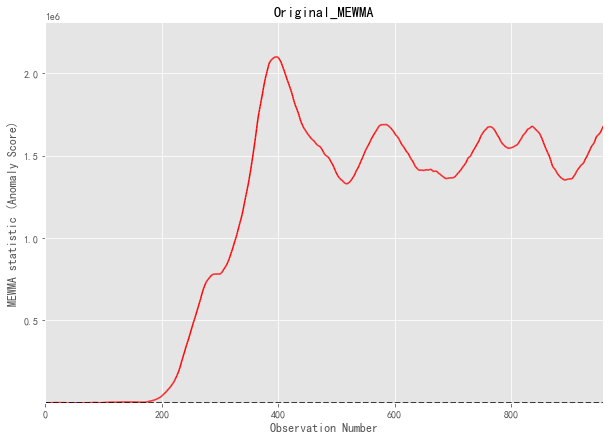

In [6]:


res=PEC.mewma(df=XX, num_in_control=100, alpha=0.9, 
               lambd=0.1, plotting=True, plot_title='Original_MEWMA')





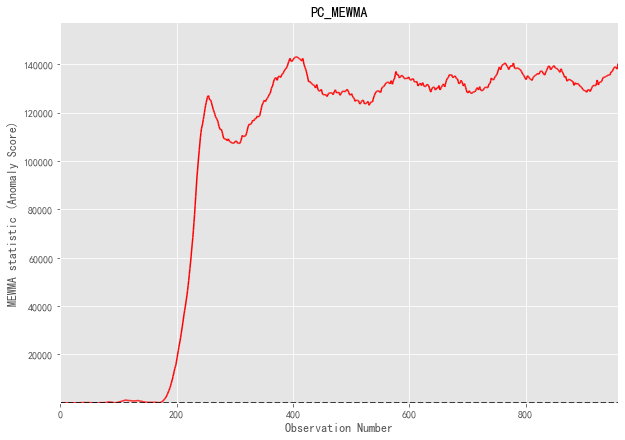

In [7]:

res=PEC.pca_mewma(df=XX, num_in_control=100,num_princ_comps=3, alpha=0.9, 
               lambd=0.1, plotting=True, plot_title='PC_MEWMA')


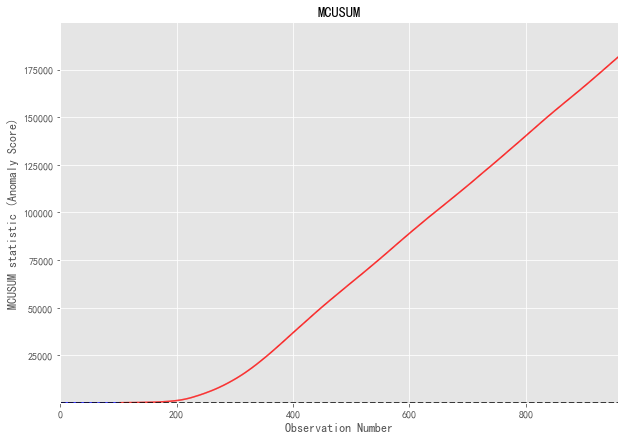

In [8]:
res=PEC.mcusum(df=XX, num_in_control=100, k=0.5, alpha=0, plotting=True, 
             plot_title='MCUSUM')

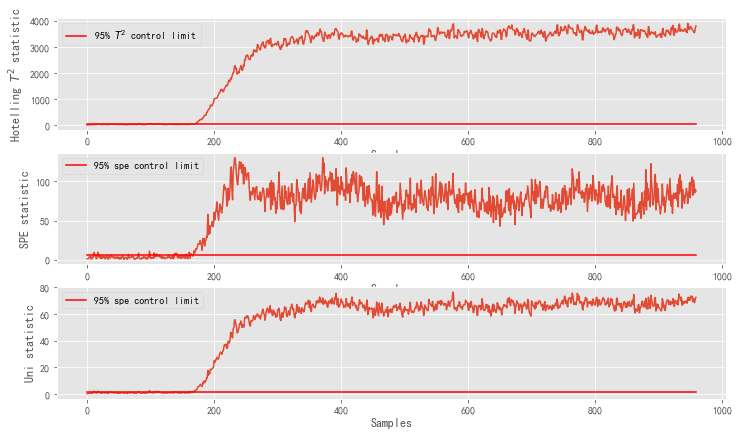

In [9]:
# PCA
t2_UCL, spe_UCL, uni_UCL, p_mat, v_mat, v_all, n_pc, p_all = PTSU.pca_control_limit(Xtrain_nor)

# 在线监测
t2_all, spe_all = PTSU.pca_model_online(Xtest_fault, p_mat, v_mat)

PTSU.figure_control_limit(Xtest_fault, t2_UCL, spe_UCL, uni_UCL, t2_all, spe_all)




No handles with labels found to put in legend.
No handles with labels found to put in legend.


[5, 18, 19, 20]


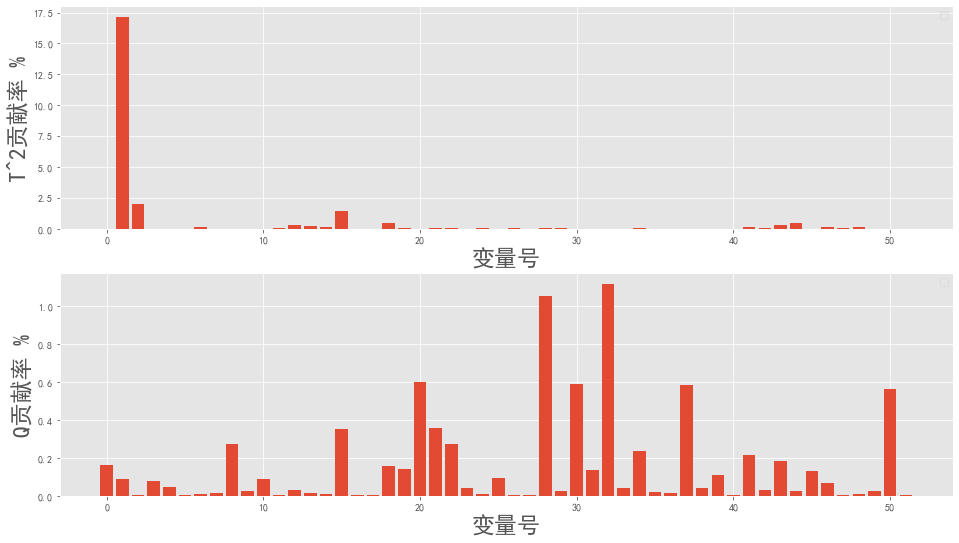

In [10]:
PTSU.Contribution_graph(fault02_test, nor_train, 600, p_mat, p_all, v_all, n_pc, t2_UCL)